<a href="https://colab.research.google.com/github/DZ28/Data-Analysis-of-Camp-Fire-in-Paradise-CA/blob/main/Advanced_Landsat_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daniel Zhang Air Quality Initiative V-AQ 6/24/2023

Begin with importing matplotlib and numpy.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Connect Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Create paths for the input files and the output folder.

In [ ]:
# import os.path
from os import path as path

# here is the standard path to our Landsat data files
catalog_fold = '/content/drive/MyDrive/Landsat_data_files'
print("My path to the mySEES folder is {}".format(catalog_fold))

catalog_folder = '/content/drive/MyDrive/Maps_from_advanced_project_NASA'

My path to the mySEES folder is /content/drive/MyDrive/Landsat_data_files


In [ ]:
id, temp, xcord, ycord = np.loadtxt("/content/drive/MyDrive/Landsat_data_files/LC08_ParadiseCA_20181007_ST_B10_pts.txt", unpack = True, usecols = (0,1,2,3))

Convert temperatures

In [ ]:
convert_list = list(range(0, 16))


def convert_to_kelvin(Temperature):
  temperatures_in_kelvin = np.zeros(len(Temperature))
  for i in range(len(Temperature)):
    location_temp = Temperature[i] * 0.00341802 + 149
    temperatures_in_kelvin[i] = location_temp
  return temperatures_in_kelvin

def convert_to_celsius(Temperature):
  temperatures_in_celsius = np.zeros(len(Temperature))
  for i in range(len(Temperature)):
    location_temp = Temperature[i] - 293.15
    temperatures_in_celsius[i] = location_temp
  return temperatures_in_celsius

Function for the min, max, mean, and median values.


In [ ]:
def special_values(temp_values):
  min = np.min(temp_values)
  max = np.max(temp_values)
  mean = np.average(temp_values)
  median = np.median(temp_values)
  return min, max, mean, median



This function draws a map for each value. I then drew a map for each date, with the date in the title of the map.

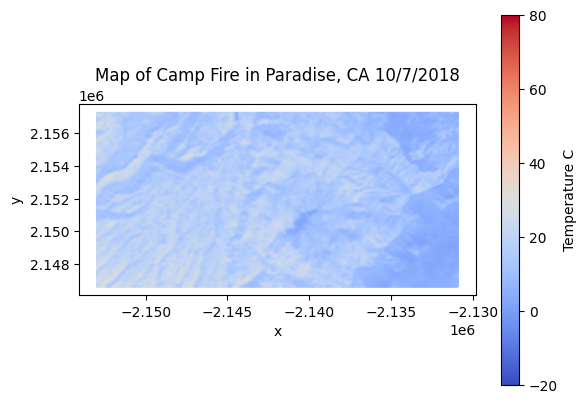

In [ ]:
def show_map(x, y, quantity, title, fileName):
    ax = plt.axes(aspect = 'equal')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    tt = ax.scatter(x, y, c = quantity, edgecolors = 'none', s = 2, vmin = -20, vmax = 80, cmap = "coolwarm")
    plt.colorbar(tt, label ="Temperature C")
    plt.savefig(fileName)


show_map(xcord, ycord, convert_to_celsius(convert_to_kelvin(temp)), 'Map of Camp Fire in Paradise, CA 10/7/2018', path.join(catalog_folder, 'Zhang_pic_20181007.png'))

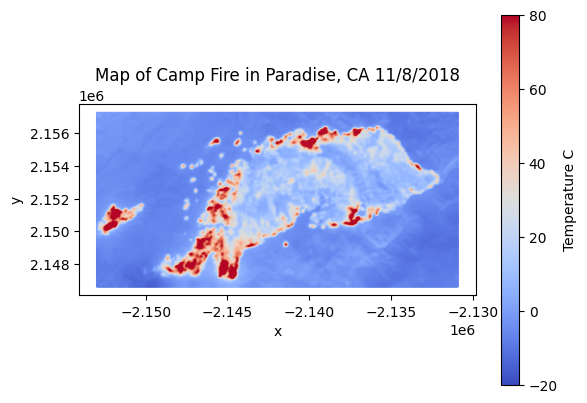

In [ ]:
# second day
id, temp2, xcord, ycord = np.loadtxt("/content/drive/MyDrive/Landsat_data_files/LC08_ParadiseCA_20181108_ST_B10_pts.txt", unpack = True, usecols = (0,1,2,3))
show_map(xcord, ycord, convert_to_celsius(convert_to_kelvin(temp2)), 'Map of Camp Fire in Paradise, CA 11/8/2018', path.join(catalog_folder, 'Zhang_pic_20181108.png'))



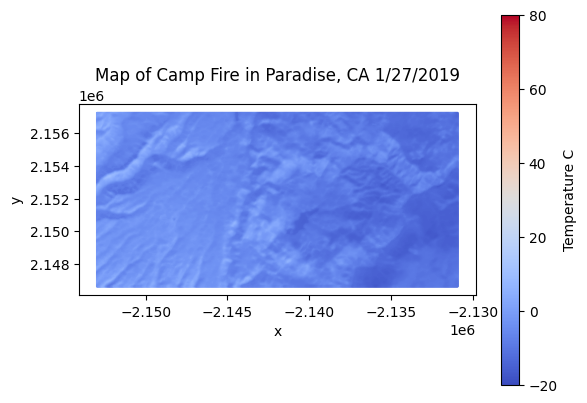

In [ ]:
# third day
id, temp3, xcord, ycord = np.loadtxt("/content/drive/MyDrive/Landsat_data_files/LC08_ParadiseCA_20190127_ST_B10_pts.txt", unpack = True, usecols = (0,1,2,3))
show_map(xcord, ycord, convert_to_celsius(convert_to_kelvin(temp3)), 'Map of Camp Fire in Paradise, CA 1/27/2019', path.join(catalog_folder, 'Zhang_pic_20190127.png'))


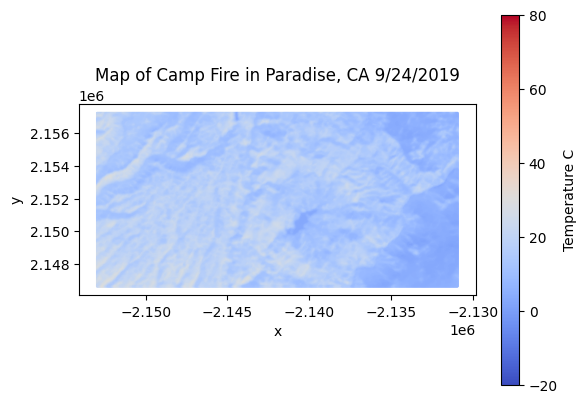

In [ ]:
# fourth day
id, temp4, xcord, ycord = np.loadtxt("/content/drive/MyDrive/Landsat_data_files/LC08_ParadiseCA_20190924_ST_B10_pts.txt", unpack = True, usecols = (0,1,2,3))
show_map(xcord, ycord, convert_to_celsius(convert_to_kelvin(temp4)), 'Map of Camp Fire in Paradise, CA 9/24/2019', path.join(catalog_folder, 'Zhang_pic_20190924.png'))

Now time for the histograms

(array([ 8463., 21171., 18184., 37334., 55367., 58082., 41856., 16267.,
         3991.,   565.]),
 array([ 1.00989138,  3.91691739,  6.8239434 ,  9.73096941, 12.63799542,
        15.54502143, 18.45204744, 21.35907345, 24.26609946, 27.17312547,
        30.08015148]),
 <BarContainer object of 10 artists>)

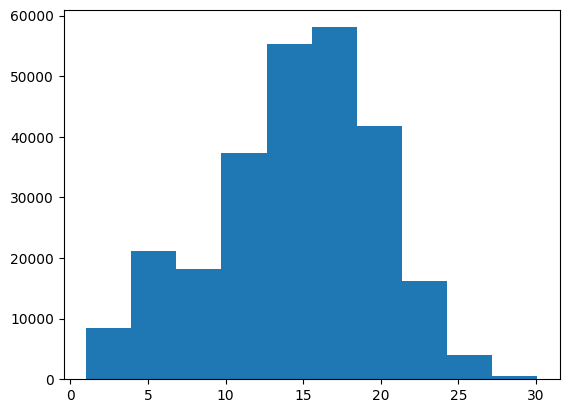

In [ ]:
plt.hist(convert_to_celsius(convert_to_kelvin(temp))) #10/7/2018

(array([ 54893., 113438.,  33564.,  24471.,  12171.,   6724.,   4576.,
          3194.,   2598.,   5651.]),
 array([-15.96399594,  -6.38260228,   3.19879139,  12.78018505,
         22.36157872,  31.94297238,  41.52436604,  51.10575971,
         60.68715337,  70.26854704,  79.8499407 ]),
 <BarContainer object of 10 artists>)

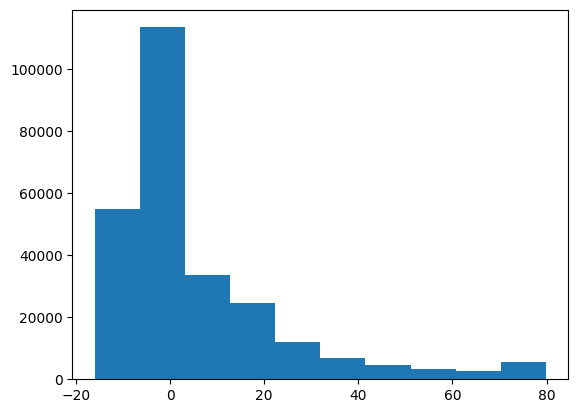

In [ ]:
plt.hist(convert_to_celsius(convert_to_kelvin(temp2))) #11/8/2018

(array([11767., 34077., 50743., 51565., 61047., 35042., 12834.,  3504.,
          624.,    77.]),
 array([-17.17397502, -14.35889375, -11.54381248,  -8.7287312 ,
         -5.91364993,  -3.09856866,  -0.28348739,   2.53159388,
          5.34667516,   8.16175643,  10.9768377 ]),
 <BarContainer object of 10 artists>)

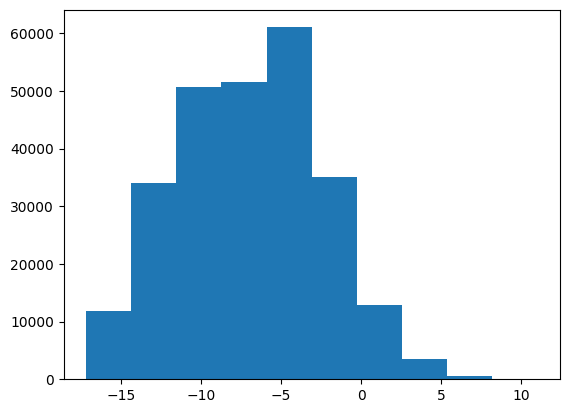

In [ ]:
plt.hist(convert_to_celsius(convert_to_kelvin(temp3))) #1/27/2019

(array([ 8463., 21171., 18184., 37334., 55367., 58082., 41856., 16267.,
         3991.,   565.]),
 array([ 1.00989138,  3.91691739,  6.8239434 ,  9.73096941, 12.63799542,
        15.54502143, 18.45204744, 21.35907345, 24.26609946, 27.17312547,
        30.08015148]),
 <BarContainer object of 10 artists>)

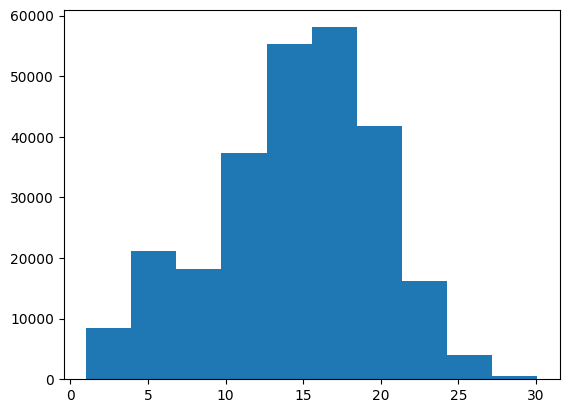

In [ ]:
plt.hist(convert_to_celsius(convert_to_kelvin(temp4))) #9/24/2019

Calculate the minimum, maximum, mean, and median.

In [ ]:
print("min max mean median")
print(special_values(convert_to_celsius(convert_to_kelvin(temp))))
print(special_values(convert_to_celsius(convert_to_kelvin(temp2))))
print(special_values(convert_to_celsius(convert_to_kelvin(temp3))))
special_values(convert_to_celsius(convert_to_kelvin(temp4)))

min max mean median
(1.0098913799999991, 30.08015148000004, 14.514649463465418, 15.068207640000026)
(-15.963995940000018, 79.84994070000005, 5.430866163771145, -2.6200458600000047)
(-17.17397502, 10.976837700000033, -6.965756125938591, -6.786612239999954)


(1.0098913799999991, 30.08015148000004, 14.514649463465418, 15.068207640000026)